In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from my_lib.net import MultiLayerNet, MultiLayerNetExtend
from my_lib.optimizer import SGD

In [2]:
(x_train, y_train), (x_test, y_test) = load_mnist(normalize=True)
x_train = x_train[:300]
y_train = y_train[:300]

In [3]:
def train_net(net, x_train, y_train, optimizer, max_epochs, train_size, batch_size):

    train_loss_list = []
    train_acc_list = []
    test_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 1

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        y_batch = y_train[batch_mask]

        grads = net.gradient(x_batch, y_batch)
        optimizer.update(net.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = net.accuracy(x_train, y_train)
            test_acc = net.accuracy(x_test, y_test)
            print(f"epoch: {epoch_cnt}, train accuracy: {train_acc:.4f}, test accuracy: {test_acc:.4f}")
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)

            epoch_cnt += 1
            if epoch_cnt > max_epochs:
                break
    return train_acc_list, test_acc_list

In [4]:
def draw_acc_plot(train_acc_list, test_acc_list, max_epochs):
    markers = {"train": "o", "test": "s"}
    x = np.arange(max_epochs)
    plt.plot(x, train_acc_list, marker="o", label="train", markevery=10)
    plt.plot(x, test_acc_list, marker="s", label="test", markevery=10)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.legend(loc="lower right")
    plt.show()

In [5]:
optimizer = SGD(lr=0.01)
max_epochs = 200
train_size = x_train.shape[0]
batch_size = 100

In [6]:
net = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
train_acc_list, test_acc_list = train_net(net, x_train, y_train, optimizer, max_epochs, train_size, batch_size)

epoch: 1, train accuracy: 0.1067, test accuracy: 0.0770
epoch: 2, train accuracy: 0.1167, test accuracy: 0.0961
epoch: 3, train accuracy: 0.1433, test accuracy: 0.1137
epoch: 4, train accuracy: 0.1833, test accuracy: 0.1384
epoch: 5, train accuracy: 0.2367, test accuracy: 0.1652
epoch: 6, train accuracy: 0.2700, test accuracy: 0.1863
epoch: 7, train accuracy: 0.2900, test accuracy: 0.2173
epoch: 8, train accuracy: 0.3200, test accuracy: 0.2379
epoch: 9, train accuracy: 0.3500, test accuracy: 0.2605
epoch: 10, train accuracy: 0.4067, test accuracy: 0.2943
epoch: 11, train accuracy: 0.4200, test accuracy: 0.3114
epoch: 12, train accuracy: 0.4267, test accuracy: 0.3217
epoch: 13, train accuracy: 0.4500, test accuracy: 0.3430
epoch: 14, train accuracy: 0.4400, test accuracy: 0.3505
epoch: 15, train accuracy: 0.4700, test accuracy: 0.3561
epoch: 16, train accuracy: 0.4700, test accuracy: 0.3694
epoch: 17, train accuracy: 0.4900, test accuracy: 0.3798
epoch: 18, train accuracy: 0.5100, test 

epoch: 145, train accuracy: 1.0000, test accuracy: 0.7645
epoch: 146, train accuracy: 1.0000, test accuracy: 0.7637
epoch: 147, train accuracy: 1.0000, test accuracy: 0.7643
epoch: 148, train accuracy: 1.0000, test accuracy: 0.7623
epoch: 149, train accuracy: 1.0000, test accuracy: 0.7659
epoch: 150, train accuracy: 1.0000, test accuracy: 0.7640
epoch: 151, train accuracy: 1.0000, test accuracy: 0.7610
epoch: 152, train accuracy: 1.0000, test accuracy: 0.7612
epoch: 153, train accuracy: 1.0000, test accuracy: 0.7645
epoch: 154, train accuracy: 1.0000, test accuracy: 0.7662
epoch: 155, train accuracy: 1.0000, test accuracy: 0.7659
epoch: 156, train accuracy: 1.0000, test accuracy: 0.7661
epoch: 157, train accuracy: 1.0000, test accuracy: 0.7648
epoch: 158, train accuracy: 1.0000, test accuracy: 0.7663
epoch: 159, train accuracy: 1.0000, test accuracy: 0.7646
epoch: 160, train accuracy: 1.0000, test accuracy: 0.7621
epoch: 161, train accuracy: 1.0000, test accuracy: 0.7648
epoch: 162, tr

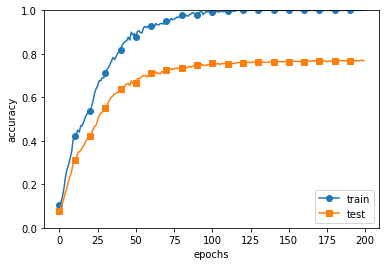

In [7]:
draw_acc_plot(train_acc_list, test_acc_list, max_epochs)

Weight decay

In [8]:
net = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], 
                    output_size=10, weight_decay_lambda=0.1)
train_acc_list, test_acc_list = train_net(net, x_train, y_train, optimizer, max_epochs, train_size, batch_size)

epoch: 1, train accuracy: 0.0867, test accuracy: 0.0970
epoch: 2, train accuracy: 0.0867, test accuracy: 0.1007
epoch: 3, train accuracy: 0.0900, test accuracy: 0.1036
epoch: 4, train accuracy: 0.1033, test accuracy: 0.1059
epoch: 5, train accuracy: 0.1200, test accuracy: 0.1121
epoch: 6, train accuracy: 0.1333, test accuracy: 0.1197
epoch: 7, train accuracy: 0.1767, test accuracy: 0.1343
epoch: 8, train accuracy: 0.1900, test accuracy: 0.1483
epoch: 9, train accuracy: 0.2267, test accuracy: 0.1618
epoch: 10, train accuracy: 0.2433, test accuracy: 0.1816
epoch: 11, train accuracy: 0.2733, test accuracy: 0.2016
epoch: 12, train accuracy: 0.3100, test accuracy: 0.2218
epoch: 13, train accuracy: 0.3600, test accuracy: 0.2536
epoch: 14, train accuracy: 0.3833, test accuracy: 0.2663
epoch: 15, train accuracy: 0.3933, test accuracy: 0.2714
epoch: 16, train accuracy: 0.4200, test accuracy: 0.2934
epoch: 17, train accuracy: 0.4367, test accuracy: 0.3118
epoch: 18, train accuracy: 0.4367, test 

epoch: 145, train accuracy: 0.8933, test accuracy: 0.7294
epoch: 146, train accuracy: 0.9000, test accuracy: 0.7368
epoch: 147, train accuracy: 0.8800, test accuracy: 0.7315
epoch: 148, train accuracy: 0.9000, test accuracy: 0.7362
epoch: 149, train accuracy: 0.8967, test accuracy: 0.7393
epoch: 150, train accuracy: 0.8933, test accuracy: 0.7353
epoch: 151, train accuracy: 0.9100, test accuracy: 0.7417
epoch: 152, train accuracy: 0.8967, test accuracy: 0.7312
epoch: 153, train accuracy: 0.9067, test accuracy: 0.7372
epoch: 154, train accuracy: 0.8900, test accuracy: 0.7314
epoch: 155, train accuracy: 0.8767, test accuracy: 0.7307
epoch: 156, train accuracy: 0.8767, test accuracy: 0.7286
epoch: 157, train accuracy: 0.8800, test accuracy: 0.7278
epoch: 158, train accuracy: 0.8933, test accuracy: 0.7316
epoch: 159, train accuracy: 0.8833, test accuracy: 0.7312
epoch: 160, train accuracy: 0.8867, test accuracy: 0.7275
epoch: 161, train accuracy: 0.8867, test accuracy: 0.7274
epoch: 162, tr

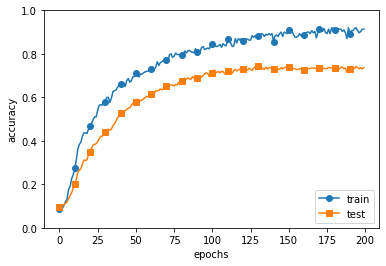

In [9]:
draw_acc_plot(train_acc_list, test_acc_list, max_epochs)

Dropout

In [10]:
net = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], 
                          output_size=10, use_dropout=True, dropout_ration=0.15)
train_acc_list, test_acc_list = train_net(net, x_train, y_train, optimizer, max_epochs, train_size, batch_size)

epoch: 1, train accuracy: 0.1200, test accuracy: 0.1008
epoch: 2, train accuracy: 0.1133, test accuracy: 0.1047
epoch: 3, train accuracy: 0.1167, test accuracy: 0.1093
epoch: 4, train accuracy: 0.1300, test accuracy: 0.1091
epoch: 5, train accuracy: 0.1267, test accuracy: 0.1152
epoch: 6, train accuracy: 0.1300, test accuracy: 0.1164
epoch: 7, train accuracy: 0.1400, test accuracy: 0.1211
epoch: 8, train accuracy: 0.1333, test accuracy: 0.1230
epoch: 9, train accuracy: 0.1400, test accuracy: 0.1273
epoch: 10, train accuracy: 0.1433, test accuracy: 0.1305
epoch: 11, train accuracy: 0.1567, test accuracy: 0.1404
epoch: 12, train accuracy: 0.1633, test accuracy: 0.1482
epoch: 13, train accuracy: 0.1833, test accuracy: 0.1581
epoch: 14, train accuracy: 0.2067, test accuracy: 0.1674
epoch: 15, train accuracy: 0.2167, test accuracy: 0.1737
epoch: 16, train accuracy: 0.2133, test accuracy: 0.1755
epoch: 17, train accuracy: 0.2233, test accuracy: 0.1833
epoch: 18, train accuracy: 0.2367, test 

epoch: 145, train accuracy: 0.6200, test accuracy: 0.5229
epoch: 146, train accuracy: 0.6167, test accuracy: 0.5201
epoch: 147, train accuracy: 0.6100, test accuracy: 0.5248
epoch: 148, train accuracy: 0.6100, test accuracy: 0.5246
epoch: 149, train accuracy: 0.6133, test accuracy: 0.5257
epoch: 150, train accuracy: 0.6067, test accuracy: 0.5286
epoch: 151, train accuracy: 0.6167, test accuracy: 0.5306
epoch: 152, train accuracy: 0.6167, test accuracy: 0.5342
epoch: 153, train accuracy: 0.6200, test accuracy: 0.5363
epoch: 154, train accuracy: 0.6267, test accuracy: 0.5386
epoch: 155, train accuracy: 0.6333, test accuracy: 0.5391
epoch: 156, train accuracy: 0.6400, test accuracy: 0.5478
epoch: 157, train accuracy: 0.6367, test accuracy: 0.5506
epoch: 158, train accuracy: 0.6367, test accuracy: 0.5505
epoch: 159, train accuracy: 0.6300, test accuracy: 0.5530
epoch: 160, train accuracy: 0.6267, test accuracy: 0.5488
epoch: 161, train accuracy: 0.6300, test accuracy: 0.5526
epoch: 162, tr

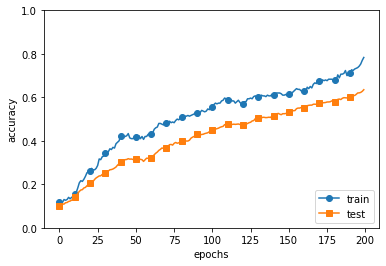

In [11]:
draw_acc_plot(train_acc_list, test_acc_list, max_epochs)